In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('german_data.csv', sep=',', header=None)
df.columns = ["check_acc_status", "duration_months", "credit_his", "credit_purpose", 
                "credit_amount", "savings_acc", "present_emp", "disposable_rate", "sex", "other_debtors", 
                "present_resid_months", "property", "age", "other_install", "housing", "num_credits", 
                "job", "num_people", "telephone", "foreign", "response"]
df.head()

,check_acc_status,duration_months,credit_his,credit_purpose,credit_amount,savings_acc,present_emp,disposable_rate,sex,other_debtors,...,property,age,other_install,housing,num_credits,job,num_people,telephone,foreign,response
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [3]:
df.shape

(1000, 21)

In [4]:
df.isnull().sum().sum()

0

In [5]:
df.dtypes

check_acc_status        object
duration_months          int64
credit_his              object
credit_purpose          object
credit_amount            int64
savings_acc             object
present_emp             object
disposable_rate          int64
sex                     object
other_debtors           object
present_resid_months     int64
property                object
age                      int64
other_install           object
housing                 object
num_credits              int64
job                     object
num_people               int64
telephone               object
foreign                 object
response                 int64
dtype: object

In [6]:
categorical_vars = ['check_acc_status', 'credit_his', 'credit_purpose', 'savings_acc', 
                    'present_emp', 'sex', 'other_debtors', 'property', 'other_install',
                    'housing', 'job', 'telephone', 'foreign']

numerical_vars = ['duration_months', 'credit_amount', 'disposable_rate', 'present_resid_months',
                  'age', 'num_credits', 'num_people', 'response']

In [7]:
df[numerical_vars].describe()

,duration_months,credit_amount,disposable_rate,present_resid_months,age,num_credits,num_people,response
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


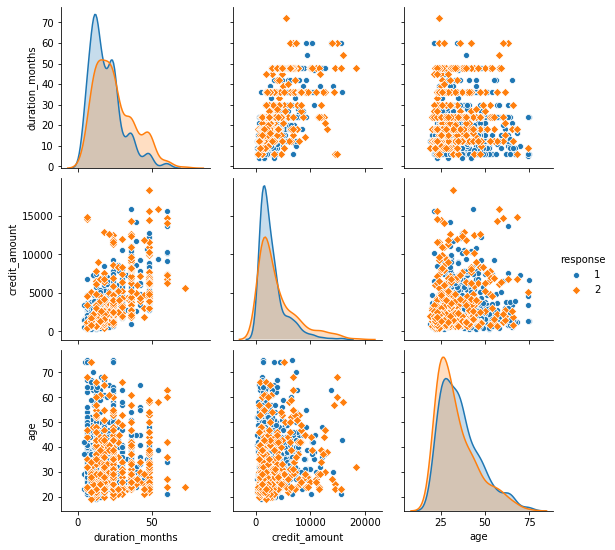

In [8]:
import seaborn as sns

sns.pairplot(df, vars=['duration_months', 'credit_amount', 'age'], hue='response', markers=["o", "D"])

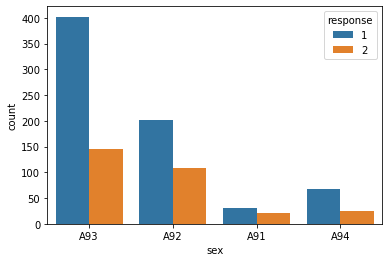

In [9]:
sns.countplot(x='sex', hue='response', data=df)

In [10]:
from sklearn import preprocessing

numerical_std = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df[numerical_vars].drop(['response'], axis=1)))

In [11]:
numerical_std[1].describe()

count    1.000000e+03
mean     6.661338e-17
std      1.000500e+00
min     -1.070865e+00
25%     -6.754833e-01
50%     -3.373443e-01
75%      2.484620e-01
max      5.370789e+00
Name: 1, dtype: float64

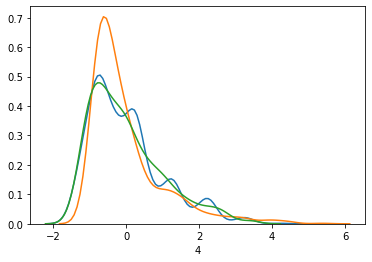

In [12]:
import seaborn as sns

sns.distplot(numerical_std[0], hist=False, rug=False)
sns.distplot(numerical_std[1], hist=False, rug=False)
sns.distplot(numerical_std[4], hist=False, rug=False)


In [13]:
df.replace([1,2], [1,0], inplace=True)
df['response'].value_counts()
df.head()

,check_acc_status,duration_months,credit_his,credit_purpose,credit_amount,savings_acc,present_emp,disposable_rate,sex,other_debtors,...,property,age,other_install,housing,num_credits,job,num_people,telephone,foreign,response
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,0,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,0,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,0,A93,A101,...,A121,49,A143,A152,1,A172,0,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,0,A93,A103,...,A122,45,A143,A153,1,A173,0,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,0,A173,0,A191,A201,0


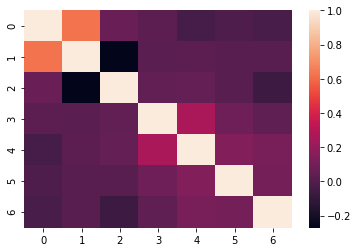

In [14]:
corr = numerical_std.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [15]:
dummy_vars = pd.get_dummies(df[categorical_vars])
# df_clean = pd.concat([df[numerical_vars], pd.get_dummies(df[categorical_vars])], axis=1)
df_std = pd.concat([numerical_std, df['response'], dummy_vars], axis=1)
df_std.head()

,0,1,2,3,4,5,6,response,check_acc_status_A11,check_acc_status_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_A201,foreign_A202
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,1,1,0,...,1,0,0,0,1,0,0,1,1,0
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,0,0,1,...,1,0,0,0,1,0,1,0,1,0
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,1,0,0,...,1,0,0,1,0,0,1,0,1,0
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,1,1,0,...,0,1,0,0,1,0,1,0,1,0
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,0,1,0,...,0,1,0,0,1,0,1,0,1,0


In [16]:
df_std.corr()

,0,1,2,3,4,5,6,response,check_acc_status_A11,check_acc_status_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_A201,foreign_A202
0,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,-0.214927,0.022244,0.089452,...,-0.075169,0.189117,-0.044043,-0.181203,0.055010,0.147515,-0.164718,0.164718,0.138196,-0.138196
1,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,-0.154739,-0.020912,0.119612,...,-0.117497,0.201643,-0.027969,-0.161757,-0.092636,0.319715,-0.276995,0.276995,0.050050,-0.050050
2,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.072404,0.046917,-0.051906,...,0.049922,0.040098,-0.087834,-0.057237,0.042623,0.042805,-0.014413,0.014413,0.090024,-0.090024
3,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.002967,0.088350,-0.055817,...,-0.297547,0.227044,-0.034545,0.009065,-0.000657,0.004952,-0.095359,0.095359,0.054097,-0.054097
4,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,0.091127,-0.011162,-0.078121,...,0.006553,0.253058,0.059954,0.043712,-0.148283,0.127605,-0.145259,0.145259,0.006151,-0.006151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
job_A174,0.147515,0.319715,0.042805,0.004952,0.127605,-0.010906,-0.015096,-0.040559,-0.022427,0.051999,...,-0.071741,0.154388,-0.062511,-0.208392,-0.543852,1.000000,-0.385706,0.385706,0.051858,-0.051858
telephone_A191,-0.164718,-0.276995,-0.014413,-0.095359,-0.145259,-0.065553,0.014753,-0.036466,0.067149,-0.015276,...,0.036275,-0.114036,0.040124,0.253720,0.061289,-0.385706,1.000000,-1.000000,-0.107401,0.107401
telephone_A192,0.164718,0.276995,0.014413,0.095359,0.145259,0.065553,-0.014753,0.036466,-0.067149,0.015276,...,-0.036275,0.114036,-0.040124,-0.253720,-0.061289,0.385706,-1.000000,1.000000,0.107401,-0.107401
foreign_A201,0.138196,0.050050,0.090024,0.054097,0.006151,0.009717,-0.077071,-0.082079,-0.057751,0.059172,...,-0.018960,0.068205,-0.042834,-0.087412,0.047292,0.051858,-0.107401,0.107401,1.000000,-1.000000


In [17]:
from sklearn.model_selection import train_test_split

x = df_std.drop('response', axis=1)
y = df['response']

n_classes = y.shape[0]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

In [18]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=None, random_state=0)
clf = clf.fit(x_train,y_train)

[Text(228.89140625, 211.7178947368421, 'X[10] <= 0.5\ngini = 0.419\nsamples = 700\nvalue = [209, 491]'),
 Text(170.43003472222222, 200.2736842105263, 'X[0] <= 1.004\ngini = 0.484\nsamples = 425\nvalue = [174, 251]'),
 Text(121.10451388888889, 188.82947368421054, 'X[16] <= 0.5\ngini = 0.458\nsamples = 343\nvalue = [122, 221]'),
 Text(86.00347222222223, 177.38526315789474, 'X[1] <= 2.731\ngini = 0.415\nsamples = 245\nvalue = [72, 173]'),
 Text(83.24791666666667, 165.94105263157894, 'X[11] <= 0.5\ngini = 0.402\nsamples = 240\nvalue = [67, 173]'),
 Text(69.01805555555555, 154.49684210526317, 'X[23] <= 0.5\ngini = 0.381\nsamples = 223\nvalue = [57, 166]'),
 Text(54.33611111111111, 143.05263157894737, 'X[4] <= -0.884\ngini = 0.362\nsamples = 211\nvalue = [50, 161]'),
 Text(39.266666666666666, 131.60842105263157, 'X[21] <= 0.5\ngini = 0.458\nsamples = 59\nvalue = [21, 38]'),
 Text(36.51111111111111, 120.16421052631578, 'X[47] <= 0.5\ngini = 0.444\nsamples = 57\nvalue = [19, 38]'),
 Text(28.93

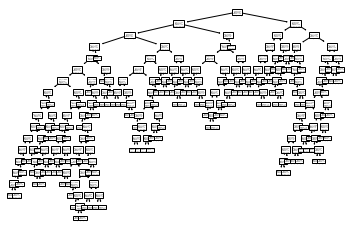

In [19]:
from sklearn import tree

tree.plot_tree(clf)

In [20]:
y_pred = clf.predict(x_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.51      0.48        91
           1       0.78      0.74      0.76       209

    accuracy                           0.67       300
   macro avg       0.62      0.62      0.62       300
weighted avg       0.68      0.67      0.67       300



In [22]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("tn, fp, fn, tp")
print(tn, "", fp, "", fn, "", tp)

tn, fp, fn, tp
46  45  54  155


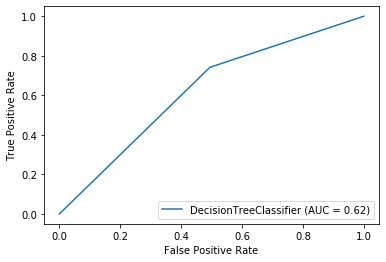

In [24]:
# from sklearn.metrics import roc_curve, auc

# fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# roc_auc =  auc(fpr, tpr)

# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC')
# plt.legend(loc="lower right")
# plt.show()

from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

disp = plot_roc_curve(clf, x_test, y_test)
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(max_depth=None, random_state=0)
clf2 = clf2.fit(x_train, y_train)

In [26]:
y_pred2 = clf2.predict(x_test)

In [27]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.69      0.40      0.50        91
           1       0.78      0.92      0.84       209

    accuracy                           0.76       300
   macro avg       0.74      0.66      0.67       300
weighted avg       0.75      0.76      0.74       300



In [28]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred2).ravel()
print("tn, fp, fn, tp")
print(tn, "", fp, "", fn, "", tp)

tn, fp, fn, tp
36  55  16  193


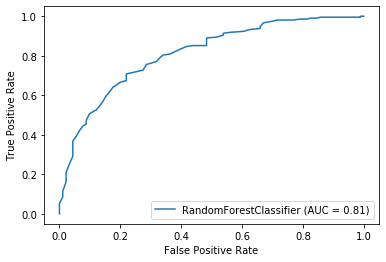

In [29]:
from sklearn.metrics import plot_roc_curve

disp2 = plot_roc_curve(clf2, x_test, y_test)
plt.show()

In [30]:
from sklearn.ensemble import AdaBoostClassifier

clf3 = AdaBoostClassifier()
clf3.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [31]:
y_pred3 = clf3.predict(x_test)

In [32]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.59      0.41      0.48        91
           1       0.77      0.88      0.82       209

    accuracy                           0.73       300
   macro avg       0.68      0.64      0.65       300
weighted avg       0.72      0.73      0.72       300



In [33]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred3).ravel()
print("tn, fp, fn, tp")
print(tn, "", fp, "", fn, "", tp)

tn, fp, fn, tp
37  54  26  183


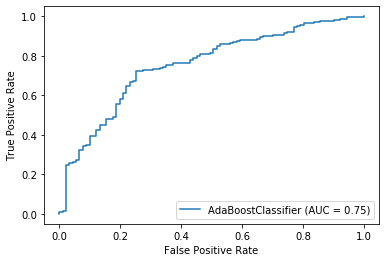

In [34]:
disp3 = plot_roc_curve(clf3, x_test, y_test)
plt.show()

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

clf4 = GradientBoostingClassifier()
clf4.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [36]:
y_pred4 = clf4.predict(x_test)

In [37]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.70      0.46      0.56        91
           1       0.80      0.91      0.85       209

    accuracy                           0.78       300
   macro avg       0.75      0.69      0.70       300
weighted avg       0.77      0.78      0.76       300



In [38]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred4).ravel()
print("tn, fp, fn, tp")
print(tn, "", fp, "", fn, "", tp)

tn, fp, fn, tp
42  49  18  191


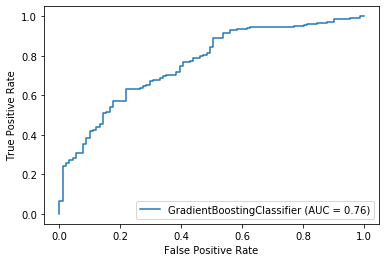

In [39]:
disp4 = plot_roc_curve(clf4, x_test, y_test)
plt.show()

In [40]:
import xgboost as xgb
from xgboost import XGBClassifier

clf5 = XGBClassifier()
clf5.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [42]:
y_pred5 = clf5.predict(x_test)

In [43]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.68      0.48      0.56        91
           1       0.80      0.90      0.85       209

    accuracy                           0.77       300
   macro avg       0.74      0.69      0.71       300
weighted avg       0.76      0.77      0.76       300



In [44]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred5).ravel()
print("tn, fp, fn, tp")
print(tn, "", fp, "", fn, "", tp)

tn, fp, fn, tp
44  47  21  188


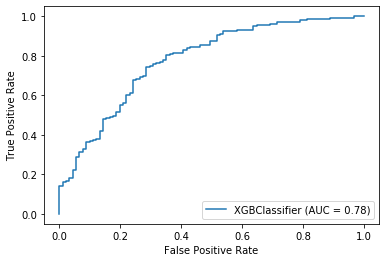

In [45]:
disp5 = plot_roc_curve(clf5, x_test, y_test)
plt.show()

In [46]:
from sklearn.svm import SVC

clf6 = SVC(gamma='auto')
clf6.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
y_pred6 = clf6.predict(x_test)

In [48]:
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.83      0.21      0.33        91
           1       0.74      0.98      0.84       209

    accuracy                           0.75       300
   macro avg       0.78      0.59      0.59       300
weighted avg       0.77      0.75      0.69       300



In [49]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred6).ravel()
print("tn, fp, fn, tp")
print(tn, "", fp, "", fn, "", tp)

tn, fp, fn, tp
19  72  4  205


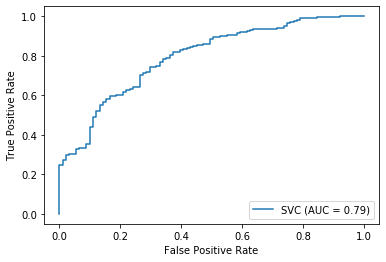

In [50]:
disp6 = plot_roc_curve(clf6, x_test, y_test)
plt.show()

In [52]:
from sklearn.neural_network import MLPClassifier

clf7 = MLPClassifier()
clf7.fit(x_train, y_train)

c:\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [53]:
y_pred7 = clf7.predict(x_test)

In [54]:
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.61      0.47      0.53        91
           1       0.79      0.87      0.83       209

    accuracy                           0.75       300
   macro avg       0.70      0.67      0.68       300
weighted avg       0.73      0.75      0.74       300



In [55]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred7).ravel()
print("tn, fp, fn, tp")
print(tn, "", fp, "", fn, "", tp)

tn, fp, fn, tp
43  48  28  181


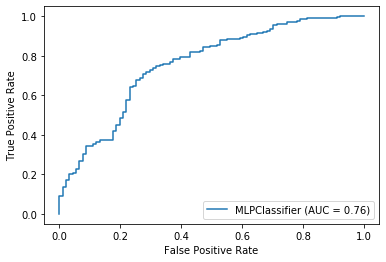

In [59]:
disp7 = plot_roc_curve(clf7, x_test, y_test)
plt.show()